Plot in the maintext

In [13]:
# Plot H1 rejection rates

import pickle
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

In [14]:
#===================================list of parameters===============================
# name of the Model
ModelList = ["logistic", "normal", "poisson", "logcosh"]
# In this set of experiments, we do not randomly generate beta.
randomBeta = "False"
# distribution to generate covariate observations
# XdistList = ["uniform", "normal"]
Xdist = "uniform"
# type of the test statistic
# testtypeList = ["Wald", "likelihoodRatio"]
testtype = "Wald"
# whether fix the matrix U
fixedU = False
# training sample size
nList = [300, 2000]
# The upper bound of the L2 norm of the covariates
XBound = 1
# Epsilon in local differential privacy protection
LapEpsilon = 20
# fix a set of randomly generated U and change sample size
# fixedUList = [True, False]
fixedUList = [False]
# covariance values
sigList  = [0, 0.1, 0.25]

# Setting index: from 1 to 9
SettingList = list(range(1, 10))

K = 5

In [15]:
Model = ModelList[2]
# mechanism = "Laplace"
mechanism = "Gaussian"

In [16]:
SettingNames = [f"{(i-1)//3 + 1}-{(i-1)%3 + 1}" for i in SettingList]
SettingInd2 = [1, 1, 1, 2, 2, 2, 3, 3, 3]
SettingInd3 = [1, 2, 3, 1, 2, 3, 1, 2, 3]

# Subtract 1 from each element
SettingInd2 = [x - 1 for x in SettingInd2]
SettingInd3 = [x - 1 for x in SettingInd3]

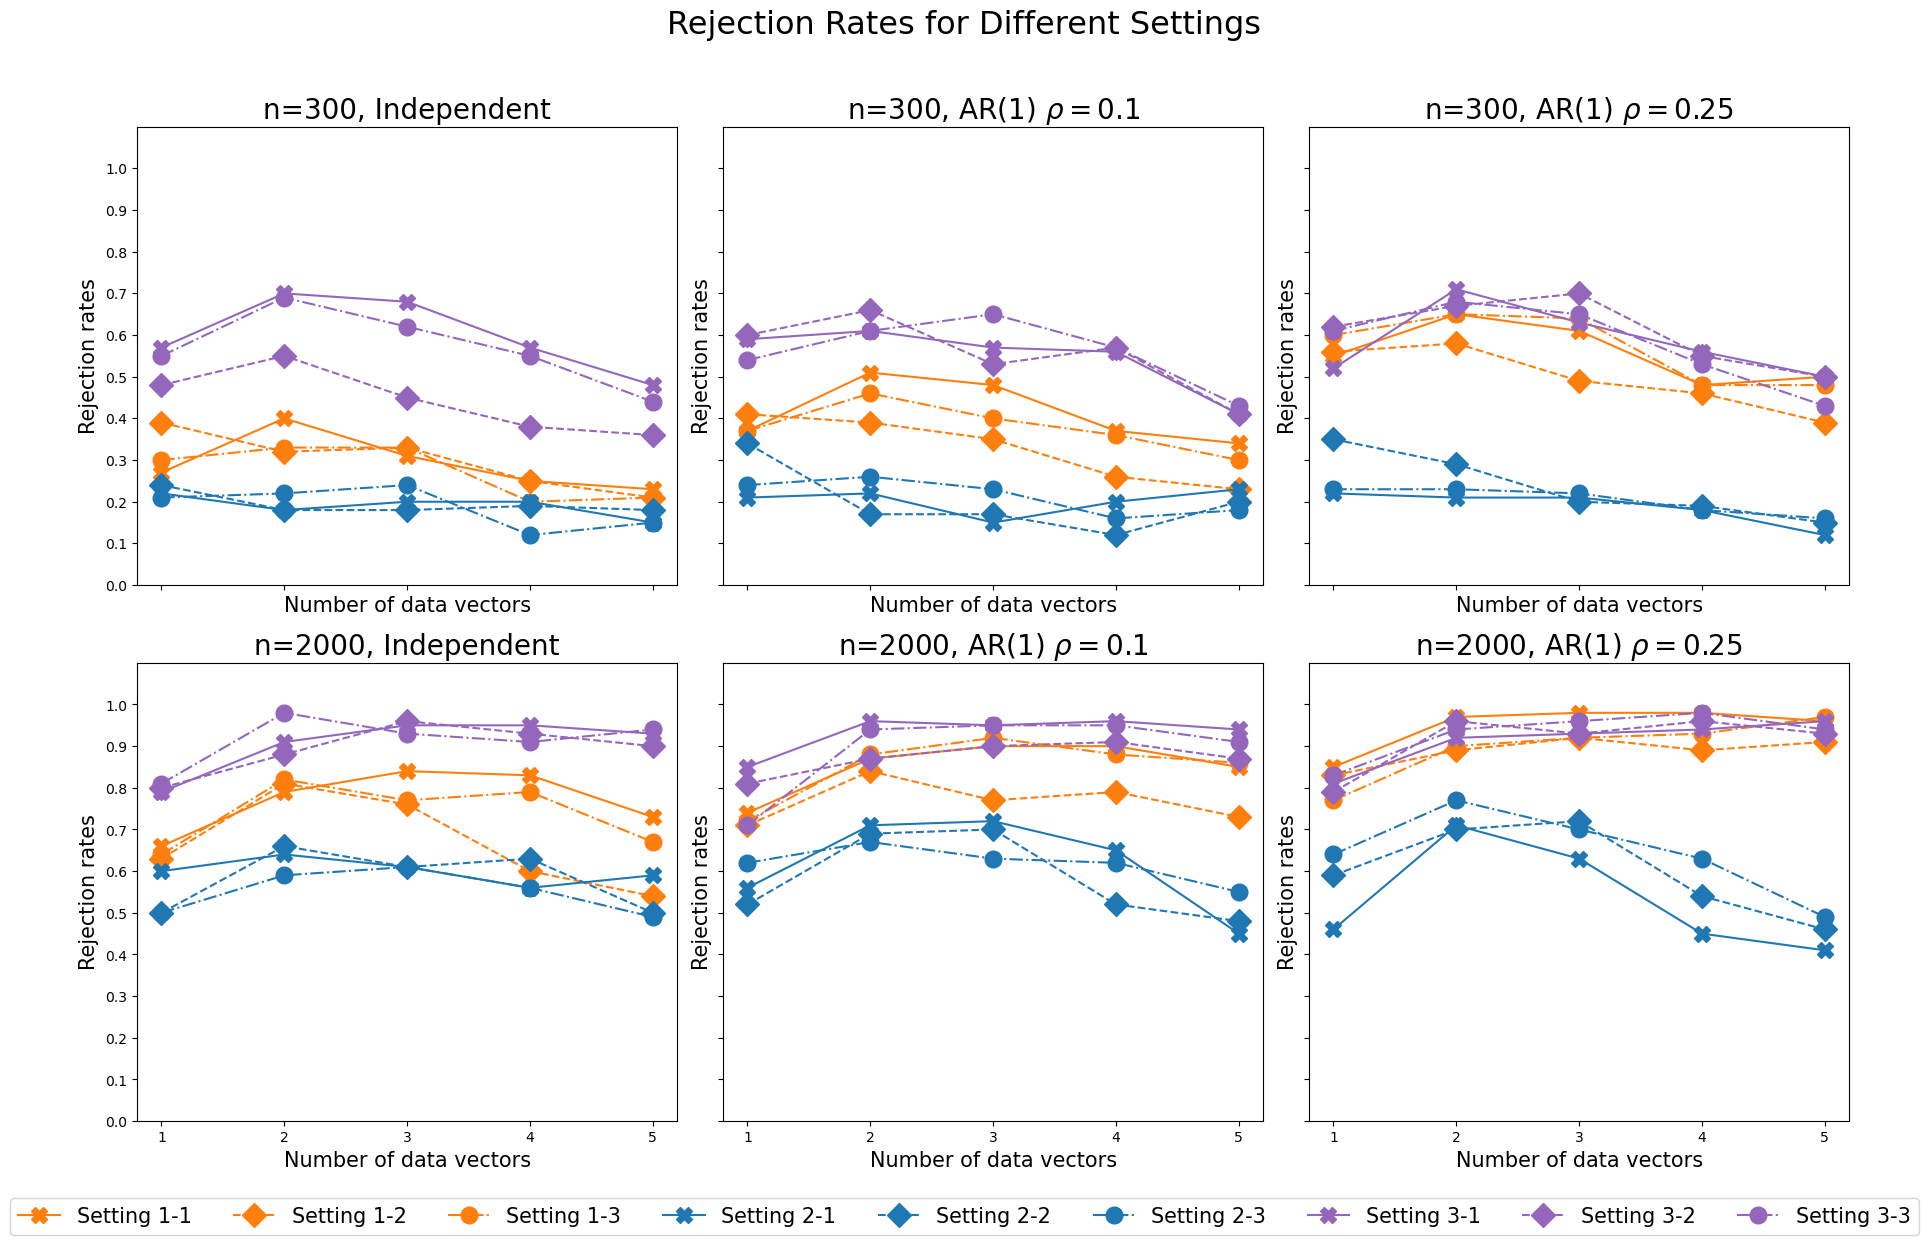

In [17]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12), sharex=True, sharey=True)
fig.suptitle("Rejection Rates for Different Settings", fontsize=23)

legend_handles = []  # To store legend handles for each subplot
legend_labels = []  # To store legend labels for each subplot

colorList = ['tab:orange', 'tab:blue', 'tab:purple']
markerList = ["X", "D", "o", "^", "P", "*"]
linetypeList = ['-', '--','-.']

ylimList = [0.6, 0.9]


for col, sig in enumerate(sigList):
    for row, n in enumerate(nList):
        if sig == 0:
            sigtype = 'Independent'
        else:
            sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

        VecInd = np.array(range(1, (K + 1)), int)
        ax = axs[row, col]

        # Adding suptitles
        ax.set_title(r'n=' + str(n) + ', ' + sigtype , fontsize=20)
        rej_arrayList = []
        for setInd in SettingList:
            fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_mechanism_" + str(mechanism) + "_XBound_" + str(XBound) + "_LapEpsilon_" + str(LapEpsilon) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
            infile = open( Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
            new_dict = pickle.load(infile)
            infile.close()

            rej_array = new_dict["rej"]
            np.sum(rej_array, axis = 0)
            rej_arrayList.append(np.mean(rej_array, axis = 0))
        
        line1, = ax.plot(VecInd, rej_arrayList[0], label='Setting ' + SettingNames[0], color=colorList[SettingInd2[0]], marker=markerList[SettingInd3[0]], linestyle=linetypeList[SettingInd3[0]], markersize=12)
        line2, = ax.plot(VecInd, rej_arrayList[1], label='Setting ' + SettingNames[1], color=colorList[SettingInd2[1]], marker=markerList[SettingInd3[1]], linestyle=linetypeList[SettingInd3[1]], markersize=12)
        line3, = ax.plot(VecInd, rej_arrayList[2], label='Setting ' + SettingNames[2], color=colorList[SettingInd2[2]], marker=markerList[SettingInd3[2]], linestyle=linetypeList[SettingInd3[2]], markersize=12)
        line4, = ax.plot(VecInd, rej_arrayList[3], label='Setting ' + SettingNames[3], color=colorList[SettingInd2[3]], marker=markerList[SettingInd3[3]], linestyle=linetypeList[SettingInd3[3]], markersize=12)
        line5, = ax.plot(VecInd, rej_arrayList[4], label='Setting ' + SettingNames[4], color=colorList[SettingInd2[4]], marker=markerList[SettingInd3[4]], linestyle=linetypeList[SettingInd3[4]], markersize=12)
        line6, = ax.plot(VecInd, rej_arrayList[5], label='Setting ' + SettingNames[5], color=colorList[SettingInd2[5]], marker=markerList[SettingInd3[5]], linestyle=linetypeList[SettingInd3[5]], markersize=12)
        line7, = ax.plot(VecInd, rej_arrayList[6], label='Setting ' + SettingNames[6], color=colorList[SettingInd2[6]], marker=markerList[SettingInd3[6]], linestyle=linetypeList[SettingInd3[6]], markersize=12)
        line8, = ax.plot(VecInd, rej_arrayList[7], label='Setting ' + SettingNames[7], color=colorList[SettingInd2[7]], marker=markerList[SettingInd3[7]], linestyle=linetypeList[SettingInd3[7]], markersize=12)
        line9, = ax.plot(VecInd, rej_arrayList[8], label='Setting ' + SettingNames[8], color=colorList[SettingInd2[8]], marker=markerList[SettingInd3[8]], linestyle=linetypeList[SettingInd3[8]], markersize=12)

        if col == 0:
            legend_handles.extend([line1, 
                                   line2,
                                   line3,
                                   line4,
                                   line5,
                                   line6,
                                   line7,
                                   line8,
                                   line9])  # Collect handles for legend
            legend_labels.extend(['Setting ' + SettingNames[0], 
                                  'Setting ' + SettingNames[1],
                                  'Setting ' + SettingNames[2],
                                  'Setting ' + SettingNames[3],
                                  'Setting ' + SettingNames[4],
                                  'Setting ' + SettingNames[5],
                                  'Setting ' + SettingNames[6],
                                  'Setting ' + SettingNames[7],
                                  'Setting ' + SettingNames[8]])  # Collect labels for legend

        ax.ticklabel_format(style='plain', axis='x', useOffset=False)
        ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
        ax.set_ylim([0, 1.1])
        ax.set_yticks(np.arange(0, 1.01, 0.1))
        ax.set_xlabel("Number of data vectors", fontsize=15)
        ax.set_ylabel("Rejection rates", fontsize=15)

# Add combined legend at the bottom with only the first two columns, move it downwards
fig.legend(handles=legend_handles[:9], labels=legend_labels[:9], loc='lower center', ncol=9, bbox_to_anchor=(0.5, -0.05), prop={'size': 15})

# Adjust layout and save the figure
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(str(Model)+"_results/rej_arrayList_model_" + str(Model) + "_mechanism_" + str(mechanism) + "_LapEpsilon_" + str(LapEpsilon) +'P1.pdf', bbox_inches='tight')
plt.show()

In [18]:
# nList = [2000]

# # Create a 3x3 grid of subplots
# fig, axs = plt.subplots(1, 3, figsize=(18, 12), sharex=True, sharey=True)
# fig.suptitle("Rejection Rates for Different Settings", fontsize=23)

# legend_handles = []  # To store legend handles for each subplot
# legend_labels = []  # To store legend labels for each subplot

# colorList = ['tab:orange', 'tab:blue', 'tab:purple']
# markerList = ["X", "D", "o", "^", "P", "*"]
# linetypeList = ['-', '--','-.']

# ylimList = [0.6, 0.9]


# for col, sig in enumerate(sigList):
#     for row, n in enumerate(nList):
#         if sig == 0:
#             sigtype = 'Independent'
#         else:
#             sigtype = 'AR(1) ' + r'$\rho=' + str(sig) + '$'

#         VecInd = np.array(range(1, (K + 1)), int)
#         # ax = axs[row, col]
#         ax = axs[col]

#         # Adding suptitles
#         ax.set_title(r'n=' + str(n) + ', ' + sigtype , fontsize=20)
#         rej_arrayList = []
#         for setInd in SettingList:
#             fname = Model + "_Setting_" + str(setInd) + "_n_" + str(n) + "_mechanism_" + str(mechanism) + "_XBound_" + str(XBound) + "_LapEpsilon_" + str(LapEpsilon) + "_sig_" + str(sig) + "_Xdist_" + str(Xdist) + "_testtype_" + testtype + "_fixedU_" + str(fixedU) + "_randomBeta_" + str(randomBeta)
#             infile = open( Model + "_results/resultsH1/data/" + fname + '_dic.p', 'rb')
#             new_dict = pickle.load(infile)
#             infile.close()

#             rej_array = new_dict["rej"]
#             np.sum(rej_array, axis = 0)
#             rej_arrayList.append(np.mean(rej_array, axis = 0))
        
#         line1, = ax.plot(VecInd, rej_arrayList[0], label='Setting ' + SettingNames[0], color=colorList[SettingInd2[0]], marker=markerList[SettingInd3[0]], linestyle=linetypeList[SettingInd3[0]], markersize=12)
#         line2, = ax.plot(VecInd, rej_arrayList[1], label='Setting ' + SettingNames[1], color=colorList[SettingInd2[1]], marker=markerList[SettingInd3[1]], linestyle=linetypeList[SettingInd3[1]], markersize=12)
#         line3, = ax.plot(VecInd, rej_arrayList[2], label='Setting ' + SettingNames[2], color=colorList[SettingInd2[2]], marker=markerList[SettingInd3[2]], linestyle=linetypeList[SettingInd3[2]], markersize=12)
#         line4, = ax.plot(VecInd, rej_arrayList[3], label='Setting ' + SettingNames[3], color=colorList[SettingInd2[3]], marker=markerList[SettingInd3[3]], linestyle=linetypeList[SettingInd3[3]], markersize=12)
#         line5, = ax.plot(VecInd, rej_arrayList[4], label='Setting ' + SettingNames[4], color=colorList[SettingInd2[4]], marker=markerList[SettingInd3[4]], linestyle=linetypeList[SettingInd3[4]], markersize=12)
#         line6, = ax.plot(VecInd, rej_arrayList[5], label='Setting ' + SettingNames[5], color=colorList[SettingInd2[5]], marker=markerList[SettingInd3[5]], linestyle=linetypeList[SettingInd3[5]], markersize=12)
#         line7, = ax.plot(VecInd, rej_arrayList[6], label='Setting ' + SettingNames[6], color=colorList[SettingInd2[6]], marker=markerList[SettingInd3[6]], linestyle=linetypeList[SettingInd3[6]], markersize=12)
#         line8, = ax.plot(VecInd, rej_arrayList[7], label='Setting ' + SettingNames[7], color=colorList[SettingInd2[7]], marker=markerList[SettingInd3[7]], linestyle=linetypeList[SettingInd3[7]], markersize=12)
#         line9, = ax.plot(VecInd, rej_arrayList[8], label='Setting ' + SettingNames[8], color=colorList[SettingInd2[8]], marker=markerList[SettingInd3[8]], linestyle=linetypeList[SettingInd3[8]], markersize=12)

#         if col == 0:
#             legend_handles.extend([line1, 
#                                    line2,
#                                    line3,
#                                    line4,
#                                    line5,
#                                    line6,
#                                    line7,
#                                    line8,
#                                    line9])  # Collect handles for legend
#             legend_labels.extend(['Setting ' + SettingNames[0], 
#                                   'Setting ' + SettingNames[1],
#                                   'Setting ' + SettingNames[2],
#                                   'Setting ' + SettingNames[3],
#                                   'Setting ' + SettingNames[4],
#                                   'Setting ' + SettingNames[5],
#                                   'Setting ' + SettingNames[6],
#                                   'Setting ' + SettingNames[7],
#                                   'Setting ' + SettingNames[8]])  # Collect labels for legend

#         ax.ticklabel_format(style='plain', axis='x', useOffset=False)
#         ax.xaxis.set_major_locator(mticker.MultipleLocator(1))
#         ax.set_ylim([0, 0.9])
#         ax.set_yticks(np.arange(0, 0.901, 0.1))
#         ax.set_xlabel("Number of data vectors", fontsize=15)
#         ax.set_ylabel("Rejection rates", fontsize=15)

# # Add combined legend at the bottom with only the first two columns, move it downwards
# fig.legend(handles=legend_handles[:9], labels=legend_labels[:9], loc='lower center', ncol=9, bbox_to_anchor=(0.5, -0.05), prop={'size': 15})

# # Adjust layout and save the figure
# plt.tight_layout(rect=[0, 0, 1, 0.96])
# plt.savefig(str(Model)+"_results/rej_arrayList_model_" + str(Model) + "_mechanism_" + str(mechanism) + "_LapEpsilon_" + str(LapEpsilon) +'.pdf', bbox_inches='tight')
# plt.show()